In [2]:
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install statsmodels
%pip install scikit-learn

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load datasets
train_df_model_final = pd.read_csv("train_df_model_final.csv")
train_df_model_final.head()

train_df = pd.read_csv("train_df.csv")
train_df.head()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 72.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 74.9 MB/s  0:00:006m0:00:01
   ━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━━━━━ 1/3 [numpy]  WARNING: The scripts f2py and numpy-config are installed in '/usr/local/python/3.12.1/bin' which is not on PATH.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [pandas]2m2/3 [pandas]
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 29.7 MB/s  0:00:00m0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 56.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 66.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 66.9 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━╺━━━━━━━━━━━━━━━━━━━━━━ 3/7 [fonttools]  WARNING: The scripts fonttools, pyftmerge, pyftsubs

,Date,Total Revenue,CloudCover,Temperature,WindSpeed,WeatherCode,KielerWeek,Holiday,Easter,Year,...,Month,Lag7_Total_Revenue,IsNewYearsEve,IsHalloween,year_sin1,year_cos1,year_sin2,year_cos2,year_sin3,year_cos3
0,2013-07-01,1269.249107,6.0,17.8375,15.0,20.0,False,True,0.0,2013.0,...,7,NaN,False,False,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000
1,2013-07-02,1430.008397,3.0,17.3125,10.0,NaN,False,True,0.0,2013.0,...,7,NaN,False,False,0.017202,0.999852,0.034398,0.999408,0.051584,0.998669
2,2013-07-03,1124.274894,7.0,21.0750,6.0,61.0,False,True,0.0,2013.0,...,7,NaN,False,False,0.034398,0.999408,0.068755,0.997634,0.103031,0.994678
3,2013-07-04,1184.309567,7.0,18.8500,7.0,20.0,False,True,0.0,2013.0,...,7,NaN,False,False,0.051584,0.998669,0.103031,0.994678,0.154204,0.988039
4,2013-07-05,1288.023060,5.0,19.9750,12.0,NaN,False,True,0.0,2013.0,...,7,NaN,False,False,0.068755,0.997634,0.137185,0.990545,0.204966,0.978769


In [5]:

# i want to merge Revenue prod 1, Revenue prod 2, Revenue prod 3 from train_df to train_df_model_final based on the common column date
train_df = pd.merge(train_df_model_final, train_df[['Date', 'Revenue prod 1', 'Revenue prod 2', 'Revenue prod 3', 'Revenue prod 4', 'Revenue prod 5', 'Revenue prod 6']], on='Date', how='left')
train_df.head()

# instead of having 6 separate revenue columns, i want to have a product category column in which each row indicates the product category (1 to 6) and a revenue column that indicates the revenue for that product category
train_df = pd.melt(train_df, id_vars=[col for col in train_df.columns if col not in ['Revenue prod 1', 'Revenue prod 2', 'Revenue prod 3', 'Revenue prod 4', 'Revenue prod 5', 'Revenue prod 6']], 
                          value_vars=['Revenue prod 1', 'Revenue prod 2', 'Revenue prod 3', 'Revenue prod 4', 'Revenue prod 5', 'Revenue prod 6'], 
                          var_name='Product Category', value_name='Revenue')
train_df['Product Category'] = train_df['Product Category'].str.replace('Revenue prod ', '').astype(int)
train_df.head()

,Date,Holiday,NextDayHoliday,IsWeekend,Month,KielerWeek,IsNewYearsEve,IsHalloween,t,lag_1,Lag7_Total_Revenue,roll7_mean,roll28_mean,year_sin1,year_cos1,year_sin2,year_cos2,Total Revenue,Product Category,Revenue
0,2013-07-01,True,True,False,7,False,False,False,0,NaN,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,1269.249107,1,148.828353
1,2013-07-02,True,True,False,7,False,False,False,1,1269.249107,NaN,NaN,NaN,0.017202,0.999852,0.034398,0.999408,1430.008397,1,159.793757
2,2013-07-03,True,True,False,7,False,False,False,2,1430.008397,NaN,NaN,NaN,0.034398,0.999408,0.068755,0.997634,1124.274894,1,111.885594
3,2013-07-04,True,True,False,7,False,False,False,3,1124.274894,NaN,NaN,NaN,0.051584,0.998669,0.103031,0.994678,1184.309567,1,168.864941
4,2013-07-05,True,True,False,7,False,False,False,4,1184.309567,NaN,NaN,NaN,0.068755,0.997634,0.137185,0.990545,1288.023060,1,171.280754


In [6]:
# now i delete the total revenue column
train_df = train_df.drop(columns=['Total Revenue'])


In [7]:
train_df.head()

# i delete Lag7_Total_Revenue column
train_df = train_df.drop(columns=['Lag7_Total_Revenue'])
train_df.head()

,Date,Holiday,NextDayHoliday,IsWeekend,Month,KielerWeek,IsNewYearsEve,IsHalloween,t,lag_1,roll7_mean,roll28_mean,year_sin1,year_cos1,year_sin2,year_cos2,Product Category,Revenue
0,2013-07-01,True,True,False,7,False,False,False,0,NaN,NaN,NaN,0.000000,1.000000,0.000000,1.000000,1,148.828353
1,2013-07-02,True,True,False,7,False,False,False,1,1269.249107,NaN,NaN,0.017202,0.999852,0.034398,0.999408,1,159.793757
2,2013-07-03,True,True,False,7,False,False,False,2,1430.008397,NaN,NaN,0.034398,0.999408,0.068755,0.997634,1,111.885594
3,2013-07-04,True,True,False,7,False,False,False,3,1124.274894,NaN,NaN,0.051584,0.998669,0.103031,0.994678,1,168.864941
4,2013-07-05,True,True,False,7,False,False,False,4,1184.309567,NaN,NaN,0.068755,0.997634,0.137185,0.990545,1,171.280754


In [8]:
# i download the final train_df to a csv file
train_df.to_csv("train_df_adjusted.csv", index=False)

In [9]:
import pandas as pd
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# -----------------------------
# 1) Correct file paths
# -----------------------------
train_path = "/workspaces/TeamCPH/train_df_adjusted.csv"
test_path  = "/workspaces/TeamCPH/data/test.csv"

train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

print("Train columns:", train_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


# --------------------------------------
# 2) Handle potential German headers
# --------------------------------------
# Date column could be: "Datum" (German) or "Date" (English)
# Product category could be: "Warengruppe" (German) or "Product Category"
# ID column might be: "id", "ID", or "Id"

date_col_test = "Datum" if "Datum" in test_df.columns else "Date"
prod_col_test = "Warengruppe" if "Warengruppe" in test_df.columns else "Product Category"

if "id" in test_df.columns:
    id_col = "id"
elif "ID" in test_df.columns:
    id_col = "ID"
elif "Id" in test_df.columns:
    id_col = "Id"
else:
    raise ValueError("Could not find an ID column in test.csv. Expected: id / ID / Id")


# --------------------------------------
# 3) Convert date columns to datetime
# --------------------------------------
train_df["Date"] = pd.to_datetime(train_df["Date"])
test_df[date_col_test] = pd.to_datetime(test_df[date_col_test])


# --------------------------------------
# 4) Feature engineering (train & test)
# --------------------------------------
def add_time_features(df, datecol):
    d = df[datecol]
    df = df.copy()

    df["dow"] = d.dt.dayofweek
    df["month"] = d.dt.month
    df["day"] = d.dt.day
    df["weekofyear"] = d.dt.isocalendar().week.astype(int)
    df["year"] = d.dt.year

    doy = d.dt.dayofyear
    df["doy_sin"] = np.sin(2 * np.pi * doy / 365.25)
    df["doy_cos"] = np.cos(2 * np.pi * doy / 365.25)

    df["is_weekend"] = (df["dow"] >= 5).astype(int)

    return df


train_feat = add_time_features(train_df, "Date")
test_feat  = add_time_features(test_df, date_col_test)


# --------------------------------------
# 5) Prepare X and y
# --------------------------------------
# Target column in training data must be "Revenue"
if "Revenue" not in train_feat.columns:
    raise ValueError("Training file does not contain a 'Revenue' column.")

y = train_feat["Revenue"]

# Standardize product category column name
# In your training file it should be "Product Category"
if "Product Category" not in train_feat.columns:
    raise ValueError("Training file does not contain 'Product Category' column.")

train_feat["product"] = train_feat["Product Category"]
test_feat["product"]  = test_feat[prod_col_test]

feature_cols = [
    "dow", "month", "day", "weekofyear", "year",
    "doy_sin", "doy_cos", "is_weekend", "product"
]

X_train = train_feat[feature_cols]
X_test  = test_feat[feature_cols]


# --------------------------------------
# 6) Preprocessor + model pipeline
# --------------------------------------
cat_features = ["product"]
num_features = [c for c in feature_cols if c not in cat_features]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), cat_features),
        ("num", "passthrough", num_features)
    ]
)

model = RandomForestRegressor(
    n_estimators=400,
    random_state=42,
    n_jobs=-1
)

pipeline = Pipeline(steps=[
    ("preprocess", preprocessor),
    ("model", model)
])

# --------------------------------------
# 7) Train + predict
# --------------------------------------
pipeline.fit(X_train, y)
predictions = pipeline.predict(X_test)

# --------------------------------------
# 8) Export predictions
# --------------------------------------
output = pd.DataFrame({
    "id": test_df[id_col],
    "Revenue": predictions
})

out_path = "/workspaces/TeamCPH/predictions.csv"
output.to_csv(out_path, index=False)

print(f"Saved predictions to: {out_path}")
output.head()



Train columns: ['Date', 'Holiday', 'NextDayHoliday', 'IsWeekend', 'Month', 'KielerWeek', 'IsNewYearsEve', 'IsHalloween', 't', 'lag_1', 'roll7_mean', 'roll28_mean', 'year_sin1', 'year_cos1', 'year_sin2', 'year_cos2', 'Product Category', 'Revenue']
Test columns: ['id', 'Datum', 'Warengruppe']
Saved predictions to: /workspaces/TeamCPH/predictions.csv


,id,Revenue
0,1808011,152.761946
1,1808021,177.916736
2,1808031,172.598828
3,1808041,188.703680
4,1808051,70.149884


In [8]:
# Uploading new predictions with data set train_df_FINAL to kaggle

import pandas as pd
import numpy as np

from sklearn.linear_model import Ridge
from sklearn.impute import SimpleImputer


train_path = "/workspaces/TeamCPH/train_df_FINAL.csv"
test_path  = "/workspaces/TeamCPH/data/test.csv"


# -----------------------------
# 1) Load data
# -----------------------------


train_df = pd.read_csv(train_path)
test_df  = pd.read_csv(test_path)

# -----------------------------
# 2) Handle German headers in test
# -----------------------------
# Common German → English mapping
rename_map = {
    "Datum": "Date",
    "Warengruppe": "Product",
    "Umsatz": "Revenue"
}

test_df = test_df.rename(columns=rename_map)

# -----------------------------
# 3) Feature Engineering
# -----------------------------
def make_features(df, date_col="Date", product_col="Product", train_start=None):
    out = df.copy()

    # Parse date
    out[date_col] = pd.to_datetime(out[date_col])

    # Month
    out["Month"] = out[date_col].dt.month

    # Weekend
    out["IsWeekend"] = (out[date_col].dt.dayofweek >= 5).astype(int)

    # Time index t (days since training start)
    if train_start is None:
        train_start = out[date_col].min()
    out["t"] = (out[date_col] - train_start).dt.days.astype(int)

    # Yearly seasonality (sin/cos)
    doy = out[date_col].dt.dayofyear
    out["year_sin1"] = np.sin(2*np.pi*doy/365.25)
    out["year_cos1"] = np.cos(2*np.pi*doy/365.25)
    out["year_sin2"] = np.sin(4*np.pi*doy/365.25)
    out["year_cos2"] = np.cos(4*np.pi*doy/365.25)

    # One-hot Product categories (2..6 match your training set)
    for p in [2, 3, 4, 5, 6]:
        out[f"Product_{p}"] = (out[product_col].astype(int) == p).astype(float)

    # Keep Product numeric as feature too
    out["Product"] = out[product_col].astype(int)

    return out


# training start date is based on train dataset
train_start = pd.to_datetime(train_df["Date"]).min()

train_feat = make_features(train_df, date_col="Date", product_col="Product", train_start=train_start)
test_feat  = make_features(test_df,  date_col="Date", product_col="Product", train_start=train_start)

# -----------------------------
# 4) Define features
# -----------------------------
feature_cols = [
    "Month", "IsWeekend", "t",
    "year_sin1", "year_cos1", "year_sin2", "year_cos2",
    "Product_2", "Product_3", "Product_4", "Product_5", "Product_6",
    "Product"
]

X_train = train_feat[feature_cols]
y_train = train_feat["Revenue"]

X_test  = test_feat[feature_cols]

# -----------------------------
# 5) Handle missing values
# -----------------------------
imputer = SimpleImputer(strategy="median")
X_train_imp = imputer.fit_transform(X_train)
X_test_imp  = imputer.transform(X_test)

# -----------------------------
# 6) Train model
# -----------------------------
model = Ridge(alpha=1.0)
model.fit(X_train_imp, y_train)

# -----------------------------
# 7) Predict
# -----------------------------
pred = model.predict(X_test_imp)

# -----------------------------
# 8) Output file
# -----------------------------
submission = pd.DataFrame({
    "id": test_df["id"],
    "Revenue": pred
})

submission.to_csv("predicted_revenue.csv", index=False)

print("Saved file: predicted_revenue.csv")
print(submission.head())




Saved file: predicted_revenue.csv
        id     Revenue
0  1808011  131.971162
1  1808021  131.771616
2  1808031  131.538260
3  1808041  176.978253
4  1808051  176.677167


In [ ]:
# now concatenating the training and validation data set, but first i need to make sure that the validation set is in the same format as the training one (which i already know it isn't)


import pandas as pd
import numpy as np

validation_df = "/workspaces/TeamCPH/data/validation_df.csv"
validation_df = pd.read_csv(validation_df)
validation_df.head()

# i want a list of the columns in validation_df and train_df_FINAL
validation_df.columns.tolist()

train_df_FINAL = "/workspaces/TeamCPH/data/train_df_FINAL.csv"
train_df_FINAL = pd.read_csv(train_df_FINAL)
train_df_FINAL.columns.tolist()

# i want to make sure both dataset have the column Date in datetime format
validation_df["Date"] = pd.to_datetime(validation_df["Date"])
train_df_FINAL["Date"] = pd.to_datetime(train_df_FINAL["Date"])
validation_df.dtypes

# i want to remove columns CloudCover, Temperature, WindSpeed, WeatherCode from validation_df 
validation_df = validation_df.drop(columns=['CloudCover', 'Temperature', 'WindSpeed', 'WeatherCode'])
validation_df.head()

# instead of having 6 columns for revenue divided per product category, i want to have a product category column in which each row indicates the product category (1 to 6) and a revenue column that indicates the revenue for that product category
validation_df = pd.melt(validation_df, id_vars=[col for col in validation_df.columns if col not in ['Revenue prod 1', 'Revenue prod 2', 'Revenue prod 3', 'Revenue prod 4', 'Revenue prod 5', 'Revenue prod 6']], 
                          value_vars=['Revenue prod 1', 'Revenue prod 2', 'Revenue prod 3', 'Revenue prod 4', 'Revenue prod 5', 'Revenue prod 6'], 
                          var_name='Product Category', value_name='Revenue')
validation_df['Product Category'] = validation_df['Product Category'].str.replace('Revenue prod ', '').astype(int)
validation_df.head()

# i delete column total revenue
validation_df = validation_df.drop(columns=['Total Revenue'])
validation_df.head()

# i remove easter column 
validation_df = validation_df.drop(columns=['Easter'])
validation_df.head()

# i remove templevel
validation_df = validation_df.drop(columns=['TempLevel'])
validation_df.head()

# i remove temphigherthanyesterday
validation_df = validation_df.drop(columns=['TempHigherThanYesterday'])
validation_df.head()

# i remove month 
validation_df = validation_df.drop(columns=['Month'])
validation_df.head()

# oops i add month back 
validation_df['Month'] = validation_df['Date'].dt.month
validation_df.head()

# i remove lag7_total_revenue
validation_df = validation_df.drop(columns=['Lag7_Total_Revenue'])
validation_df.head()

# i remove year
validation_df = validation_df.drop(columns=['Year'])
validation_df.head()

# i copy the code from the other notebook to create one-hot encoding for product category

# now instead of having one column called product category, i want to have one hot encoded varibales for each product category
validation_df = pd.get_dummies(validation_df, columns=['Product Category'], prefix='Product', drop_first=True)
validation_df.head()


,Date,KielerWeek,Holiday,Weekday,Season,NextDayHoliday,IsSummer,IsWeekend,IsNewYearsEve,IsHalloween,Revenue,Month,Product_2,Product_3,Product_4,Product_5,Product_6
0,2017-08-01,False,True,Tuesday,Summer,True,True,False,False,False,166.135486,8,False,False,False,False,False
1,2017-08-02,False,True,Wednesday,Summer,True,True,False,False,False,155.022099,8,False,False,False,False,False
2,2017-08-03,False,True,Thursday,Summer,True,True,False,False,False,159.575340,8,False,False,False,False,False
3,2017-08-04,False,True,Friday,Summer,True,True,False,False,False,161.585239,8,False,False,False,False,False
4,2017-08-05,False,True,Saturday,Summer,True,True,True,False,False,198.088094,8,False,False,False,False,False


In [9]:
# i copy the whole process from the other notebook to create the time features 

# first i need to recreate a product column

product_cols = ["Product_2", "Product_3", "Product_4", "Product_5", "Product_6"]

def get_product(row):
    for i, c in enumerate(product_cols, start=2):
        if row[c] == 1 or row[c] is True:
            return i
    return 1  # baseline product

validation_df["Product"] = validation_df.apply(get_product, axis=1)

validation_df["Date"] = pd.to_datetime(validation_df["Date"])
validation_df = validation_df.sort_values(["Product", "Date"])

validation_df.head()

,Date,KielerWeek,Holiday,Weekday,Season,NextDayHoliday,IsSummer,IsWeekend,IsNewYearsEve,IsHalloween,Revenue,Month,Product_2,Product_3,Product_4,Product_5,Product_6,Product
0,2017-08-01,False,True,Tuesday,Summer,True,True,False,False,False,166.135486,8,False,False,False,False,False,1
1,2017-08-02,False,True,Wednesday,Summer,True,True,False,False,False,155.022099,8,False,False,False,False,False,1
2,2017-08-03,False,True,Thursday,Summer,True,True,False,False,False,159.575340,8,False,False,False,False,False,1
3,2017-08-04,False,True,Friday,Summer,True,True,False,False,False,161.585239,8,False,False,False,False,False,1
4,2017-08-05,False,True,Saturday,Summer,True,True,True,False,False,198.088094,8,False,False,False,False,False,1


In [10]:
# now i recompute lag and rolling means

validation_df["lag_1"] = (
    validation_df.groupby("Product")["Revenue"].shift(1)
)

validation_df["roll7_mean"] = (
    validation_df.groupby("Product")["Revenue"]
    .transform(lambda s: s.shift(1).rolling(7).mean())
)

validation_df["roll28_mean"] = (
    validation_df.groupby("Product")["Revenue"]
    .transform(lambda s: s.shift(1).rolling(28).mean())
)


In [11]:
# i also recompute t

validation_df["Date"] = pd.to_datetime(validation_df["Date"])
validation_df["t"] = (validation_df["Date"] - validation_df["Date"].min()).dt.days

# validation check 
validation_df.groupby("Date")["t"].nunique().max()

np.int64(1)

In [24]:
# i compute fourier features for the validation df (i copy paste the same code)
# i deleted that because it was WRONG. I ask chat gpt to provide a new code 

import pandas as pd
import numpy as np


# Ensure Date is datetime in both
train_df_FINAL["Date"] = pd.to_datetime(train_df_FINAL["Date"])
validation_df["Date"] = pd.to_datetime(validation_df["Date"])

# ----- Fourier feature function -----
def add_yearly_fourier_features(df, date_col="Date", period=365.25, order=2):
    """
    Adds Fourier seasonal features (sin/cos) for a yearly cycle.
    order=2 -> creates sin/cos for k=1 and k=2 (4 columns total)
    """
    day_of_year = df[date_col].dt.dayofyear

    for k in range(1, order + 1):
        df[f"year_sin{k}"] = np.sin(2 * np.pi * k * day_of_year / period)
        df[f"year_cos{k}"] = np.cos(2 * np.pi * k * day_of_year / period)

    return df

# Add Fourier features to validation set
validation_df = add_yearly_fourier_features(validation_df, date_col="Date", period=365.25, order=2)

# Optional: verify they match the train columns
fourier_cols = ["year_sin1", "year_cos1", "year_sin2", "year_cos2"]
print("Fourier cols now in validation:", all(c in validation_df.columns for c in fourier_cols))


Fourier cols now in validation: True


In [ ]:
# now i check if validation_df and train_df_FINAL have the same columns
set(train_df_FINAL.columns) - set(validation_df.columns)

set()

In [28]:
train_df_FINAL.head()

,Date,Holiday,NextDayHoliday,IsWeekend,Month,KielerWeek,IsNewYearsEve,IsHalloween,t,lag_1,...,year_cos1,year_sin2,year_cos2,Revenue,Product_2,Product_3,Product_4,Product_5,Product_6,Product
0,2013-07-01,True,True,False,7,False,False,False,0,NaN,...,1.000000,0.000000,1.000000,148.828353,0.0,0.0,0.0,0.0,0.0,1
1,2013-07-02,True,True,False,7,False,False,False,1,148.828353,...,0.999852,0.034398,0.999408,159.793757,0.0,0.0,0.0,0.0,0.0,1
2,2013-07-03,True,True,False,7,False,False,False,2,159.793757,...,0.999408,0.068755,0.997634,111.885594,0.0,0.0,0.0,0.0,0.0,1
3,2013-07-04,True,True,False,7,False,False,False,3,111.885594,...,0.998669,0.103031,0.994678,168.864941,0.0,0.0,0.0,0.0,0.0,1
4,2013-07-05,True,True,False,7,False,False,False,4,168.864941,...,0.997634,0.137185,0.990545,171.280754,0.0,0.0,0.0,0.0,0.0,1


In [54]:
# i print a list of columns in train_df_FINAL
train_df_FINAL.columns.tolist()

['Date',
 'Holiday',
 'NextDayHoliday',
 'IsWeekend',
 'Month',
 'KielerWeek',
 'IsNewYearsEve',
 'IsHalloween',
 't',
 'lag_1',
 'roll7_mean',
 'roll28_mean',
 'year_sin1',
 'year_cos1',
 'year_sin2',
 'year_cos2',
 'Revenue',
 'Product_2',
 'Product_3',
 'Product_4',
 'Product_5',
 'Product_6']

In [32]:
# now i have the same columns in both data sets, so i can concatenate them
combined_df = pd.concat([train_df_FINAL, validation_df], ignore_index=True)
combined_df.head()

# i want a list of columns in combined_df
combined_df.columns.tolist()

# i delete years_sin3 and year_cos3 from combined_df
combined_df = combined_df.drop(columns=['year_sin3', 'year_cos3'])
combined_df.columns.tolist()

# i check if any columns share the same name
combined_df.columns.duplicated().any()
# no

combined_df.head()

# i delete Weekday, Season, IsSummer and Product columns from combined_df
combined_df = combined_df.drop(columns=['Weekday', 'Season', 'IsSummer', 'Product'])
combined_df.head()
combined_df.columns.tolist()

['Date',
 'Holiday',
 'NextDayHoliday',
 'IsWeekend',
 'Month',
 'KielerWeek',
 'IsNewYearsEve',
 'IsHalloween',
 't',
 'lag_1',
 'roll7_mean',
 'roll28_mean',
 'year_sin1',
 'year_cos1',
 'year_sin2',
 'year_cos2',
 'Revenue',
 'Product_2',
 'Product_3',
 'Product_4',
 'Product_5',
 'Product_6']

In [ ]:
train_df_FINAL.columns.tolist()

# making sure columns are the same in train and combined 
set(train_df_FINAL.columns) - set(combined_df.columns)

set()

In [35]:
# dowloading combined_df to a csv file
combined_df.to_csv("combined_df.csv", index=False)

In [ ]:


# adding this to separate my work (lucia) from Marco's


In [10]:
# Print the summary of the model
# Includes metrics like R-squared, coefficients, and p-values for each feature
print(model.summary())

AttributeError: 'RandomForestRegressor' object has no attribute 'summary'

In [ ]:
# Print first few predictions
print("Predictions for test data:")
print(output.head())

Predictions for test data:
        id     Revenue
0  1808011  152.761946
1  1808021  177.916736
2  1808031  172.598828
3  1808041  188.703680
4  1808051   70.149884


In [ ]:
# Calculate Mean Absolute Percentage Error (MAPE) for error evaluation
mape = np.mean(np.abs((y - pipeline.predict(X_train)) / y)) * 100
print(f"Mean Absolute Percentage Error (MAPE) on training data: {mape:.2f}%")

count_zeros = np.sum(y == 0)
print(f"Number of zero revenue entries in training data: {count_zeros}")

Mean Absolute Percentage Error (MAPE) on training data: inf%
Number of zero revenue entries in training data: 1279


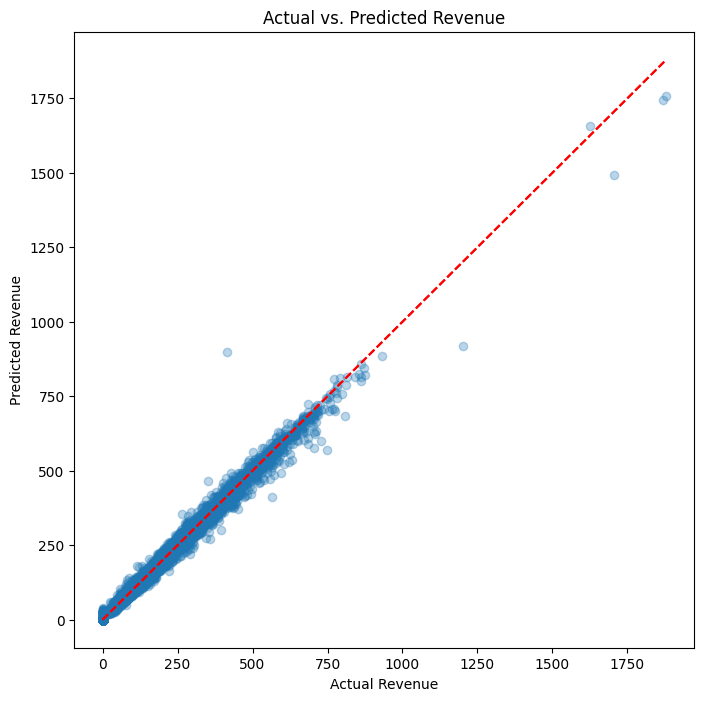

In [ ]:
# Scatter plot: Actual vs. Predicted Prices
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.scatter(y, pipeline.predict(X_train), alpha=0.3)
plt.xlabel("Actual Revenue")
plt.ylabel("Predicted Revenue")
plt.title("Actual vs. Predicted Revenue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.title("Actual vs. Predicted Revenue")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # Diagonal line
plt.show() 
 

In [ ]:
# Actual vs Predicted scatter

# each point is: (actual y, predicted y). 
# The red dashed diagonal is: y = y_pred.

# points close to diagonal → good predictions.
# systematic vertical offsets → bias (consistent over- or under-prediction).

# Interpretation: 
# if high-revenue points fall below diagonal, the model underestimates large revenues. 
# if low-revenue points are widely scattered, predictions are unreliable for small stores/products.

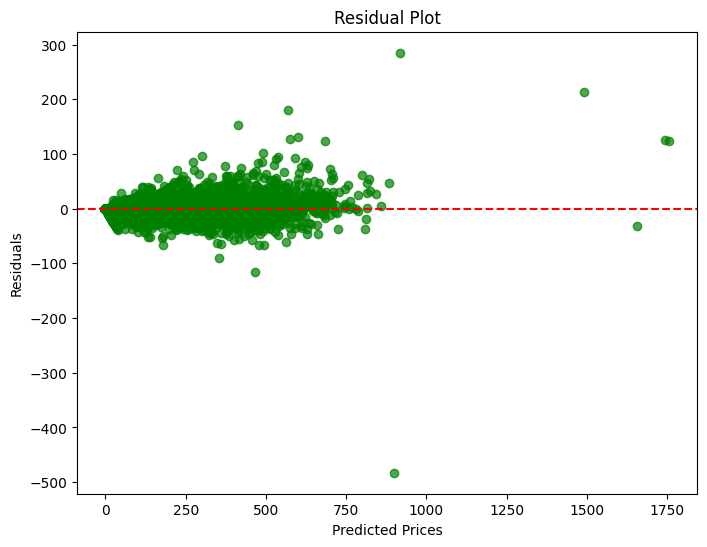

In [ ]:
# Calculate residuals (differences between actual and predicted values)
residuals = y - pipeline.predict(X_train)

# Residual plot: Predicted Prices vs. Residuals
plt.figure(figsize=(8, 6))
plt.scatter(pipeline.predict(X_train), residuals, alpha=0.7, color="green")
plt.axhline(y=0, color="red", linestyle="--")
plt.xlabel("Predicted Prices")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [ ]:
# Residuals vs Predicted (residual plot)

# residual = actual − predicted.
# horizontal red line at zero shows no error.

# scatter around zero → good; 
# pattern (e.g., curve) → missing nonlinearity; 
# increasing spread with predicted → heteroscedasticity; 
# clusters away from zero → subgroup bias; 
# many large residuals → outliers.

# Interpretation: 
# a funnel shape (wider residuals for larger predicted revenues) means variance grows with level — consider variance-stabilizing transform (log) or models that model variance (quantile/heteroscedastic regression). 
# If residuals are mostly positive for a product category, the model systematically underpredicts that category.

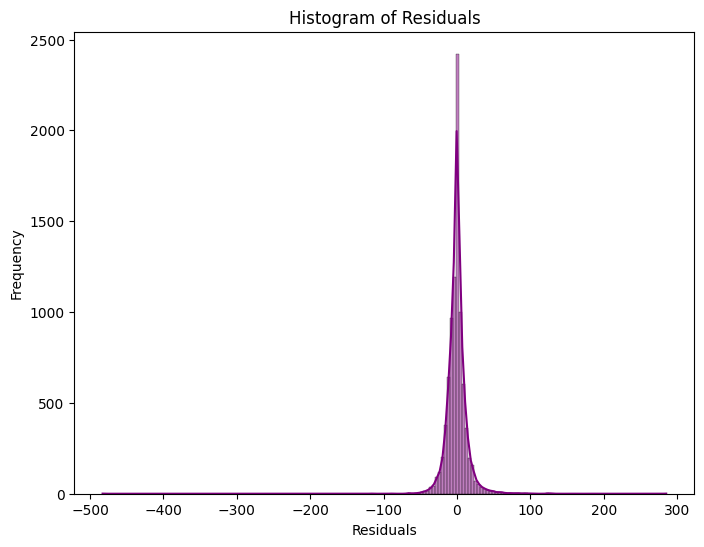

In [ ]:
# Import necessary libraries
import pandas as pd  # Data manipulation and handling
import statsmodels.api as sm  # Building and summarizing regression models
from sklearn.preprocessing import StandardScaler  # Scaling features for regression
from sklearn.model_selection import train_test_split  # Splitting data into train and test sets
import matplotlib.pyplot as plt  # Visualization library
import seaborn as sns  # Advanced data visualizations 

# Histogram of residuals to check normality
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True, color="purple")
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# Histogram of residuals (with KDE):

# Shows distribution shape of residuals. Checks approximate normality and skew/outliers.
# centered at zero → no average bias; 
# long tails or skew → outliers or asymmetric errors; 
# multimodality → different regimes (e.g., by product or season).

# Interpretation: 
# heavy tails indicate occasional large errors (important for business risk). 
# If residuals are skewed, median-based metrics or transforms may be more appropriate. 
# Normal-ish residuals support using mean-based metrics; non-normal suggests reporting robust metrics (sMAPE, MASE) and investigating drivers of large errors.